In [137]:
import pandas as pd
import numpy as np
from sklearn import metrics
import scipy.stats as stats

In [138]:
#pd.set_option('display.max_columns',500)

In [139]:
student_scores=pd.read_csv('C:/Users/saira/Desktop/Tasks/Task 1/student_scores - student_scores.csv')

In [140]:
student_scores

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


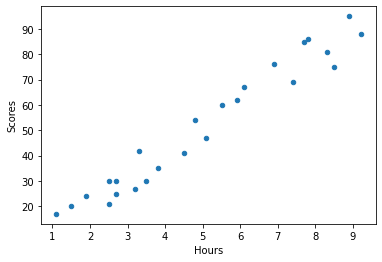

In [141]:
student_scores.plot.scatter(x='Hours',y='Scores')

In [142]:
import statsmodels.formula.api as smf

In [143]:
## Iteration 1

model = smf.ols('Scores~Hours', data=student_scores).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           9.13e-17
Time:                        19:26:18   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.3

In [144]:
actual= student_scores.Scores

In [145]:
train_pred = model.predict(student_scores.Hours)

In [146]:
compare_act_predicted=pd.concat([actual,train_pred],axis=1)

In [147]:
compare_act_predicted.columns=['actual','pridected']

In [148]:
compare_act_predicted

,actual,pridected
0,21,26.923182
1,47,52.340271
2,27,33.766244
3,75,85.578002
4,30,36.698985
5,20,17.147378
6,88,92.421065
7,60,56.250592
8,81,83.622842
9,25,28.878343


In [149]:
MAPE_train = round(np.mean(np.abs((compare_act_predicted.actual - compare_act_predicted.pridected)/compare_act_predicted.actual))*100,2)
print('MAPE = ',MAPE_train)

R2_train = round(metrics.r2_score(compare_act_predicted.actual , compare_act_predicted.pridected),4)
print('R2 = ',R2_train)

Corr_train = stats.stats.pearsonr(compare_act_predicted.actual , compare_act_predicted.pridected)
print('Corr = ',round(Corr_train[0],2))

RMSE_train = metrics.mean_squared_error(compare_act_predicted.actual , compare_act_predicted.pridected)
print('RMSE = ',round(RMSE_train,2))

MAPE =  11.82
R2 =  0.9529
Corr =  0.98
RMSE =  28.88


In [150]:
hr={'Hours':[9.25]}
hr=pd.DataFrame(hr)
train_pred_x = model.predict(hr)

print('If a student studies for 9.25 hrs/ day score would be',round(train_pred_x))

If a student studies for 9.25 hrs/ day score would be 0    93.0
dtype: float64


# If a student studies for 9.25 hrs/ day score would be  around 93